# Geo-Referencing offset in L1.5 SEVIRI Data

Until December 2017, SEVIRI L1.5 data is shifted by 1.5km SSP North and West against the nominal GEOS projection. Since
December 2017 this offset has been corrected. A flag in the data indicates if the correction has been applied. If no correction was applied, the satpy readers adjust the area extent to match the shifted data.

The purpose of this document is to illustrate how we derived the offset correction using a very simple example. 

In [1]:
%matplotlib inline

/cmsaf/nfshome/routcm/Modules_CentOS/python/3.7.2/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:163: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


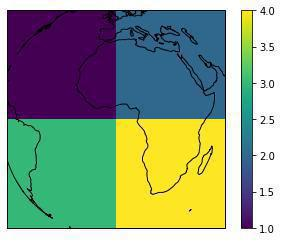

In [2]:
import pyresample.geometry
import numpy as np
import matplotlib.pyplot as plt

# Define area extent (image is upright in this example to prevent confusion)
llx, lly, urx, ury = (-5E6, -5E6, 5E6, 5E6)

# Define grid
grid = pyresample.geometry.AreaDefinition(
    area_id='some_area_name',
    description='On-the-fly area',
    proj_id='geosmsg',
    projection={'a': '6378169.0', 
                'b': '6356583.800000001', 
                'h': '35785831.0', 
                'lon_0': '0.0', 
                'proj': 'geos', 
                'units': 'm'},
    width=2, height=2,
    area_extent=(llx, lly, urx, ury)
)
crs = grid.to_cartopy_crs()

# Define simple test image
data = np.array(([1,2], 
                 [3,4]))

# Plot data on a map
ax = plt.subplot(111, projection=crs)
ax.coastlines()
im = ax.imshow(data, transform=crs, extent=crs.bounds, 
               origin='upper', vmin=1, vmax=4)
plt.colorbar(im)
plt.show()

Now we emulate a geo-referencing offset of 1 pixel in N-W direction. The yellow pixel which was originally measured over southern Africa has moved to the northern Atlantic. The other pixels have moved to space and are therefore masked.

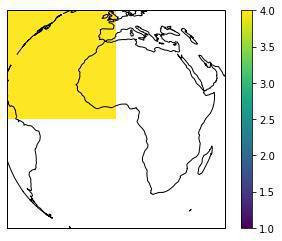

In [3]:
data_shift = np.ma.masked_invalid([[4, np.nan], 
                                   [np.nan, np.nan]])

ax = plt.subplot(111, projection=crs)
ax.coastlines()
im = ax.imshow(data_shift, transform=crs, extent=crs.bounds, 
               origin='upper', vmin=1, vmax=4)
plt.colorbar(im)
plt.show()

Finally we adjust the area definition to match the shifted data. Note that we have to shift the corners in the *opposite* direction, i.e. to S-E! Think of it as if the coastlines in the image above were fixed and you dragged the image to S-E until data and coastlines are aligned correctly. 

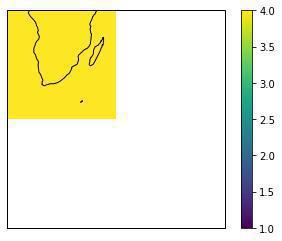

In [4]:
shift = 5E6  # One pixel

# Shift grid in S-E direction. Positive x/y is East/North, respectively.
grid_shift = pyresample.geometry.AreaDefinition(
    area_id='some_area_name',
    description='On-the-fly area',
    proj_id='geosmsg',
    projection={'a': '6378169.0', 
                'b': '6356583.800000001', 
                'h': '35785831.0', 
                'lon_0': '0.0', 
                'proj': 'geos', 
                'units': 'm'},
    width=2, height=2,
    area_extent=(llx+shift, lly-shift, urx+shift, ury-shift)
)
crs_shift = grid_shift.to_cartopy_crs()

# Plot data on a map
ax = plt.subplot(111, projection=crs_shift)
ax.coastlines()
im = ax.imshow(data_shift, transform=crs_shift, extent=crs_shift.bounds, 
               origin='upper', vmin=1, vmax=4)
plt.colorbar(im)
plt.show()